# Gyakorlat 1
## Lineáris regresszió egy változóval:
### Profit a városban:
Ebben a feladatban egy egyváltozós lineáris regressziót fogunk implementálni, melynek segítségével képesek leszünk a profit predikciójára egy élelmiszerellátó egységnek.

Képzeljük el, hogy CEO-k vagyunk egy élelmiszerláncnál és azon gondolkodunk, hogy vajon hol nyissunk egy új üzletet, melyik városokban érné meg ez nekünk. Az élelmiszerláncolatnak már megvan az ehhez szükséges feltételei csak el kéne dönteni, melyik városban bővüljön. Ehhez segítségünkre lesz a cég által begyűjtött adathalmaz a városok népességéről és a várható profitról.

### Első lépésként importáljuk be a fontos csomagokat.
Szükségünk lesz a matplotlib bizonyos elemeire és a NumPy -ra.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

### Második lépésként az adatainkat olvassuk be fileból:

In [2]:
file=open("Lab1data.txt",'r')
lines=file.readlines()
file.close()                    
# Fontos, hogy egy buborékba legyen a megnyitás és lezárás. Egyéb esetekben nem várt hibát okozhat.
# Ha a data file a main file mellett van egyszerűen megy a beolvasás. 
# Bonyolultabb fájlstruktúra esetén az egész elérési utat meg kell adni
# Irassuk is ki az eredményt, hogy lássuk mi legyen a következő lépés az adatok rendezésére
print(lines)

['6.1101,17.592\n', '5.5277,9.1302\n', '8.5186,13.662\n', '7.0032,11.854\n', '5.8598,6.8233\n', '8.3829,11.886\n', '7.4764,4.3483\n', '8.5781,12\n', '6.4862,6.5987\n', '5.0546,3.8166\n', '5.7107,3.2522\n', '14.164,15.505\n', '5.734,3.1551\n', '8.4084,7.2258\n', '5.6407,0.71618\n', '5.3794,3.5129\n', '6.3654,5.3048\n', '5.1301,0.56077\n', '6.4296,3.6518\n', '7.0708,5.3893\n', '6.1891,3.1386\n', '20.27,21.767\n', '5.4901,4.263\n', '6.3261,5.1875\n', '5.5649,3.0825\n', '18.945,22.638\n', '12.828,13.501\n', '10.957,7.0467\n', '13.176,14.692\n', '22.203,24.147\n', '5.2524,-1.22\n', '6.5894,5.9966\n', '9.2482,12.134\n', '5.8918,1.8495\n', '8.2111,6.5426\n', '7.9334,4.5623\n', '8.0959,4.1164\n', '5.6063,3.3928\n', '12.836,10.117\n', '6.3534,5.4974\n', '5.4069,0.55657\n', '6.8825,3.9115\n', '11.708,5.3854\n', '5.7737,2.4406\n', '7.8247,6.7318\n', '7.0931,1.0463\n', '5.0702,5.1337\n', '5.8014,1.844\n', '11.7,8.0043\n', '5.5416,1.0179\n', '7.5402,6.7504\n', '5.3077,1.8396\n', '7.4239,4.2885\n', 

Rendezzük a adatainkat a megfelelő változókba:
- $X$ és $Y$
- soronként szedjük ki és formázzuk az adatokat
- NumPy tömböt készítünk az $X$ és $Y$ -ból
- $m$ -be mentsük el az adatok számát
- irassuk is ki az eredményeket

In [3]:
X=[]
Y=[]
for line in lines:
  a,b = line.split(',')
  X.append(float (a))
  Y.append(float(b))

X=np.array(X)
Y=np.array(Y) 
m=Y.size
Y=Y.reshape(m,1) 

print('X dimenziója:', X.shape, '; X értékei:\n', X, '\n')                
print('Y dimenziója:', Y.shape, '; Y értékei:\n', Y, '\n')
print('Az adatok száma: ', m)

X dimenziója: (97,) ; X értékei:
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369] 

Y dimenziója: (97, 1) ; Y értékei:
 [[17.592  ]
 [ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  

Rajzoltassuk ki az adatokat egy grafikonra, hogy láthassuk az adatok struktúráját!

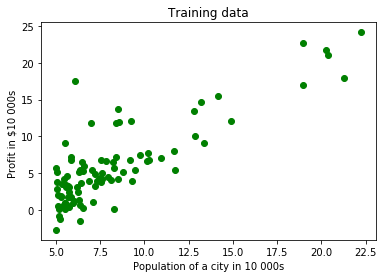

In [4]:
plt.plot(X,Y,'o', c= "g")   
plt.title("Training data")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.show()

### A hipotézis:
A grafikonon látható, hogy az adatok nagyjából egy egyenesen találhatók. Próbáljuk így közelíteni az adatainkat!

Jelen esetünkben használjuk az alábbbi modellt:

$ h_{w}(x) = w_{0} + xw_{1} $

Ilyenkor a költségfüggvényünk (Cost function) az alábbi módon kapható meg MSE (Mean Squared Error) segítségével:

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum(w_{0} + x^iw_{1} − y^{i})^2 $
 
Itt a becslésünk hibáját négyzetre emelve összegeztük!

Ha áttérünk a vektoros leírásmódra az alábbit kapjuk:

$ C = \frac{1}{2m} \cdot \sum(XW-Y)^2 $


Az $X$ tömb jelen esetben egy 1 oszlop és m sorból álló tömb. Ha ezt használnánk a regresszió során, akkor elveszítenénk a tengelymetszet beállításának lehetőségét (bias). A fent említett hipotézisünk az alábbiként nézne ki szétírva:

$ h_{w}(x) = 0 \cdot w_{0} + xw_{1} $

Ennek elkerülésére az $X$ tömbhöz hozzáfűzünk egy tiszta 1 -esekből álló oszlopot. Így a képlet az alábbiként változik:

$ h_{w}(x) = 1\cdot w_{0} + xw_{1} $

Ezáltal visszakapjuk az eredeti hipotézisünket.

Használjuk a hozzáfüzéshez a NumPy column_stack függvényét! [column_stack adatlap](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html "klikk az adatlapért")\
A teljesen 1 -esekből álló oszlop generálását pedig NumPy ones függvényét használjuk! [ones adatlap](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html "klikk az adatlapért")\
Be kell állítanunk továbbá:
- kezdeti súlyok: [0;0] (NumPy zeros segítségével könnyen beállítható [zeros adatlap](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html "klikk az adatlapért"))
- epochok száma: 1500
- tanulási ráta: 0.01

In [5]:
X=np.column_stack((np.ones(m),X))  

w=np.zeros((2,1))                 
epochs= 1500                       
learning_rate=0.01

Ellenőrizzük le a tömbjeink dimenzióját a mátixműveletek előtt.

In [6]:
print('X dimenziója:\n', X.shape)                
print('Y dimenziója:\n', Y.shape)
print('w dimenziója:\n', w.shape)

X dimenziója:
 (97, 2)
Y dimenziója:
 (97, 1)
w dimenziója:
 (2, 1)


### Költség függvény:
Definiáljuk a költségfüggvény kiszámolására egy függvényt, amely bemenő paraméterként megkapja az $X$, $Y$ és $w$ mátrixokat és a kiszámolt skalár költséggel tér vissza.

Hasznos operátorok lehetnek:
- @  : element wise matrix multiplication [mátrix szorzás](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot "dot függvény adatlapja (egyenértékű a @ használatával)")
- ** : hatványozás
- tömbelemek összegére használjuk a NumPy sum függvényét [sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html "sum adatlapjáért klikk")

In [9]:
def computeCost(X,Y,w):
    m = Y.shape[0]
    C = np.sum((X@w - Y)**2, axis=None)/(2*m)
    return C

Próbáljuk ki két értékre!

- [0;0]
- [-1;2]

In [10]:
C=computeCost(X,Y,np.array([[0],[0]]).reshape((2,1)))
print('''Testing the cost function (Error function):
\tWith weights: w = [0;0]
\tExpected value (approx.) = 32.07
\tCost computed = ''',C)
C=computeCost(X,Y,np.array([[-1],[2]]))
print('''\n\tWith weights: w = [-1;2]
\tExpected value (approx.) = 54.24
\tCost computed = ''',C)

Testing the cost function (Error function):
	With weights: w = [0;0]
	Expected value (approx.) = 32.07
	Cost computed =  32.072733877455676

	With weights: w = [-1;2]
	Expected value (approx.) = 54.24
	Cost computed =  54.24245508201238


### Grádiens módszer:
A költségfüggvényt deriválva megkapjuk a gradienst, amire a gradiensmódszer használatához lesz szükségünk. Itt fogjuk szimultán updatelni a megfelelő súlyainkat az alábbi módon:

$ temp = \frac{1}{m} \cdot \sum (h_{w}(x^{i}) - y^{i}) $

$ w_1 = \frac{1}{m} \cdot \sum(h_{w}(x^{i}) - y^{i} \cdot x_{1}^{i}) $

$ w_0 = temp $

ezt addig folytatjuk, amíg konvergenciához nem érünk.

Definiáljuk a grádiens módszeres függvényünket úgy, hogy elmentjük egy $C_history$ változóba a költségfüggvényünk előző értékeit, $w$ változóba pedig az eredményként kapott súlymátrixot!

In [11]:
def gradientDescent(X, Y, w, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros((epochs,1))

    for i in range(0,epochs):
        #VIGYÁZAT szimultán update!!!!!
        new_w=np.zeros((2,1))
        new_w[0] = w[0] - (learning_rate/m) * np.sum(X@w-Y, axis=None)
        new_w[1] = w[1] - (learning_rate/m) * np.sum((X@w-Y)*(X[:,1].reshape(97,1)), axis=None)
        w=new_w.copy()
        C_history[i] =computeCost(X,Y,w)

    return w,C_history

Futtassuk le a grádiens módszert alkalmazó függvényünket!

In [13]:
print('''\nGradient descent:
\tWeights expected (approx.): 
\t [-3.6303] [1.1664]''')
w,C_history=gradientDescent(X,Y,w,learning_rate,epochs)
print('\tWeights calculated:\n\t',w[0],w[1])


Gradient descent:
	Weights expected (approx.): 
	 [-3.6303] [1.1664]
	Weights calculated:
	 [-3.63029144] [1.16636235]


### Költségfüggvény megjelenítése az iterációk során:
Rajzoljuk ki a költségfüggvény értékeit az iterációk során! Ezáltal láthatjk, hogy a függvényben meghatározott értékek, mint az epochok száma, a learning rate ténylegesen megfelelő volt.

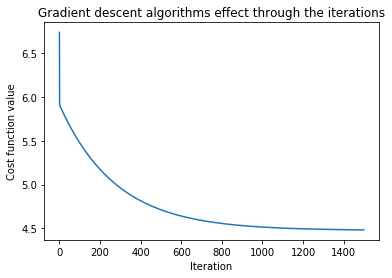

In [15]:
plt.plot(C_history)
plt.title("Gradient descent algorithms effect through the iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost function value")
plt.show()

### Az illesztett egyenes megjelenítése a bemeneti adatokra

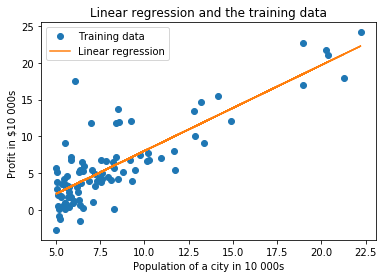

In [16]:
plt.plot((X[:,1]).reshape(97,1),Y,'o', label = "Training data")
plt.plot((X[:,1]).reshape(97,1),X@w,'-',label = "Linear regression")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

### Jóslat 35 000 és 75 000 fős populációkra

In [21]:
Prediction1 = (np.array([1, 35000]))@w
Prediction2 = (np.array([1, 75000]))@w
print('\nPrediction for 35 000:\n',Prediction1)
print('\nPrediction for 75 000:\n',Prediction2)


Prediction for 35 000:
 [40819.05197031]

Prediction for 75 000:
 [87473.54598373]


### Költségfüggvény megjelenítése / surface plot

In [ ]:
w0_vals = np.linspace(-10,10,100)
w1_vals = np.linspace(-1,4,100)
C_vals = np.zeros((w0_vals.size,w1_vals.size))

for i in range((w0_vals).size):
    for j in range((w1_vals).size):
        t=np.array([w0_vals[i],w1_vals[j]]).reshape(2,1)
        C_vals[[i],[j]]= computeCost(X,Y,t)
C_vals=C_vals.T

In [ ]:
fig= plt.figure()
ax=plt.axes(projection='3d')
x, y = np.meshgrid(w0_vals, w1_vals)
surf = ax.plot_surface(x, y, C_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Surface plot of the Cost function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

### Visualization of the Cost function / contour plot

In [ ]:
plt.contour(w0_vals,w1_vals,C_vals,np.logspace(-2,3,20))
plt.plot(w[0],w[1],'x')
plt.title("Contour plot of C_vals in logarithmic scale")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()